## bayespropestimation usage guide

The BayesProportionsEstimation class and its methods use a series of defaults which mean that user need not provide any information other than the data for samples A and B.  This notebook, covers usage where a user may want to use non-default parameters.

#### Sections

##### Class BayesProportionsEstimation
- Alternative beta priors
- Define the number of simulations
- Set the random seed

##### Method quantile_summary
- Include mean estimate or not
- Set quantiles to report
- Name the parameters

##### Method kde_plot
- Set the quantiles to visualise
- Set the figure size
- Name the parameters


In [1]:
from bayespropestimation.bayespropestimation import BayesProportionsEstimation

In [2]:
a = [10, 50]
b = [20, 50]

##### Class BayesProportionsEstimation
- Alternative beta priors

In [3]:
ExampleBayes = BayesProportionsEstimation(a, b, prior_alpha=0.1, prior_beta=0.9)
print(ExampleBayes.prior_alpha)
print(ExampleBayes.prior_beta)

0.1
0.9


- Define the number of simulations

In [4]:
ExampleBayes = BayesProportionsEstimation(a, b, n=100)
draws = ExampleBayes.get_posteriors()
for i in draws:
    print(len(i))

100
100
100


- Set the random seed

In [5]:
ExampleBayes = BayesProportionsEstimation(a, b, seed=1000)
print(ExampleBayes.seed)

1000


##### Method quantile_summary
- Include mean estimate or not

In [6]:
ExampleBayes = BayesProportionsEstimation(a, b)
ExampleBayes.quantile_summary(mean=False)

,0.025,0.5,0.975,parameter
0,0.108861,0.202947,0.328268,theta_a
1,0.269013,0.401376,0.538859,theta_b
2,0.019276,0.196776,0.369716,delta


- Set quantiles to report

In [7]:
ExampleBayes.quantile_summary(quantiles=[0.01, 0.025, 0.05, 0.95, 0.975, 0.99])

,0.01,0.025,0.05,0.95,0.975,0.99,mean,parameter
0,0.094124,0.108861,0.121567,0.306848,0.328268,0.353238,0.206965,theta_a
1,0.248111,0.269013,0.289296,0.517373,0.538859,0.566605,0.402439,theta_b
2,-0.013058,0.019276,0.047177,0.341980,0.369716,0.401697,0.195474,delta


- Name the parameters

In [8]:
ExampleBayes.quantile_summary(names = ['Sample A', 'Sample B', 'Sample B - Sample A'])

,0.025,0.5,0.975,mean,parameter
0,0.108861,0.202947,0.328268,0.206965,Sample A
1,0.269013,0.401376,0.538859,0.402439,Sample B
2,0.019276,0.196776,0.369716,0.195474,Sample B - Sample A


##### Method kde_plot
- Set the quantiles to visualise

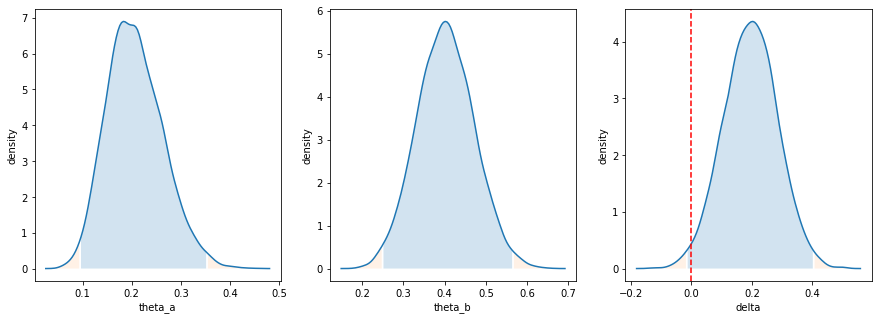

In [9]:
ExampleBayes.kde_plot(quantiles = [0.01, 0.99])

- Set the figure size

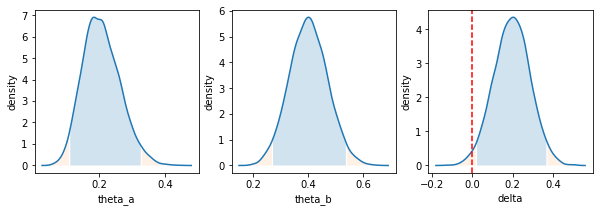

In [10]:
ExampleBayes.kde_plot(fig_size = (10, 3))

- Name the parameters

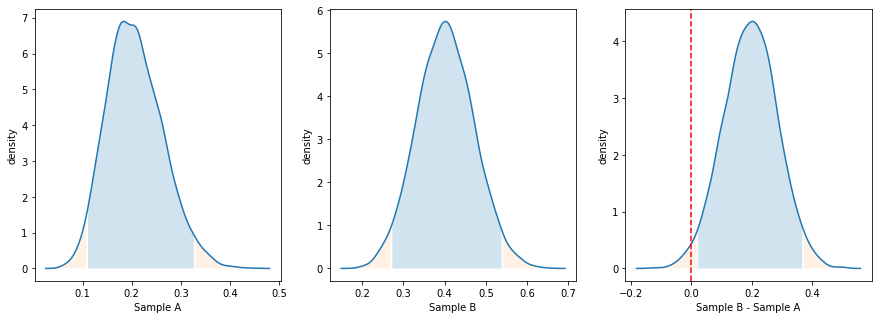

In [11]:
ExampleBayes.kde_plot(names = ['Sample A', 'Sample B', 'Sample B - Sample A'])